In [1]:
import os
from collections import defaultdict
from tqdm import tqdm

In [2]:
!pip install geopandas
!pip install shapely

import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

In [3]:
import matplotlib.pyplot as plt

In [4]:
 def coors(filename):
  with open(filename) as fp:
    f = fp.read()
    f = f.split(' ')
    f = f[5:7]
    f = [float(x) for x in f]
  return tuple(f)

In [5]:
def folders_to_coors(folder_name):
  coor_set = set()
  for file in tqdm(os.listdir(folder_name)):
    if file[-3:] == 'txt':
      coords = coors(f'{folder_name}/{file}')
      coor_set.add(coords)
  return coor_set

In [6]:
!pwd

/home/src/LUMEN-Interpretability


In [20]:
train_coors = folders_to_coors('/home/src/LUMEN-Interpretability/dataset/train/Amsterdam')
test_coors = folders_to_coors('/home/src/LUMEN-Interpretability/dataset/test/Amsterdam')

100%|██████████| 126317/126317 [00:03<00:00, 42104.25it/s]


In [8]:
train_coors = list(train_coors)
test_coors = list(test_coors)

In [12]:
trs = os.listdir('/home/src/LUMEN-Interpretability/dataset/train/Amsterdam')
tst = os.listdir('/home/src/LUMEN-Interpretability/dataset/test/Amsterdam')

In [19]:
trs[0], trs[0][:-4]


('0000095_0026834_0000006_0007054.jpg', '0000095_0026834_0000006_0007054')

In [18]:
def halve(lst):
    return lst[:round(len(lst)/2)], lst[round(2+len(lst)/2):]

In [17]:
train_coors.sort(key=lambda x: x[0])

In [19]:
first_chunk, second_chunk = halve(train_coors)

In [20]:
first_chunk.sort(key=lambda x: x[1])
second_chunk.sort(key=lambda x: x[1])

In [22]:
a, b = halve(first_chunk)
c, d = halve(second_chunk)

In [23]:
train_set = a + d
test_set = b + c

In [23]:
BBox = ((4.8475, 4.9862,
         52.3432, 52.3935))

In [25]:
amsterdam_map = plt.imread('map.png')

In [26]:
x_train = [x[0] for x in train_coors]
y_train = [x[1] for x in train_coors]

x_test = [x[0] for x in test_coors]
y_test = [x[1] for x in test_coors]

In [24]:
x_train = [x[0] for x in train_set]
y_train = [x[1] for x in train_set]

x_test = [x[0] for x in test_set]
y_test = [x[1] for x in test_set]

In [12]:
#first_chunk = train_coors[:round(len(train_coors)/2)]
#second_fold = train_coors[round(len(train_coors)/2):]


In [13]:
#x1, y1 = [x[0] for x in first_fold], [x[1] for x in first_fold]
#x2, y2 = [x[0] for x in second_fold], [x[1] for x in second_fold],

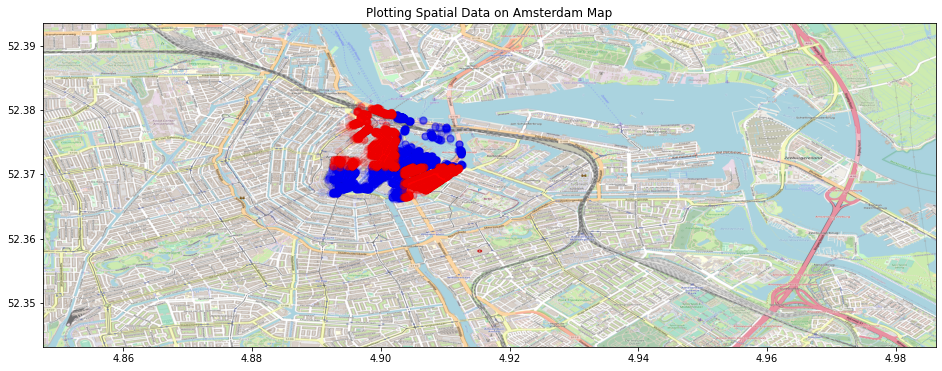

In [27]:
fig, ax = plt.subplots(figsize = (16,18))
ax.scatter(y_train, x_train, zorder=1, alpha= 0.05, c='b', s=50)
ax.scatter(y_test, x_test, zorder=1, alpha= 0.05, c='r', s=50)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(amsterdam_map, zorder=0, extent = BBox, aspect= 'equal')

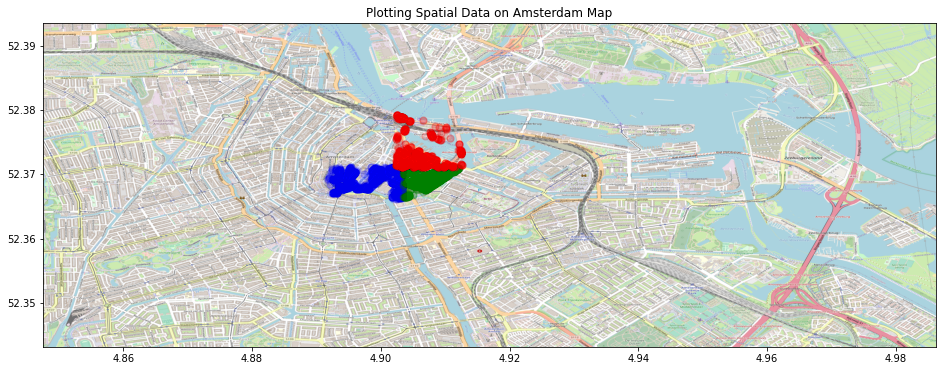

In [156]:
fig, ax = plt.subplots(figsize = (16,18))
ax.scatter([x[1] for x in train_0], [x[0] for x in train_0], zorder=1, alpha= 0.05, c='b', s=50)
ax.scatter([x[1] for x in train_1], [x[0] for x in train_1], zorder=1, alpha= 0.05, c='g', s=50)
ax.scatter([x[1] for x in test_1], [x[0] for x in test_1], zorder=1, alpha= 0.05, c='r', s=50)
ax.set_title('Plotting Spatial Data on Amsterdam Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(amsterdam_map, zorder=0, extent = BBox, aspect= 'equal')